# Shot by Shot Visualizations

In [4]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Reading in data

In [5]:
name_data = pd.read_csv('shot_name_dataset.csv')
name_data = name_data.drop(columns = ['Unnamed: 0'])

In [6]:
print(name_data)

           PLAYER_NAME  SHOT_MADE  SHOT_TYPE  LOC_X  LOC_Y  SHOT_DISTANCE  \
0         Bradley Beal          1          0   23.4  12.95             24   
1         Monte Morris          1          1   -1.3   5.25              1   
2         Monte Morris          0          1   -2.2   6.95              2   
3           Kyle Kuzma          1          0   19.7  20.55             24   
4           Kyle Kuzma          1          0   -8.3  29.85             25   
...                ...        ...        ...    ...    ...            ...   
2947516   Shawn Marion          1          1   -0.0   5.25              0   
2947517  Erick Dampier          1          1   -0.0   5.25              0   
2947518    Kurt Thomas          1          1   -0.0   5.25              0   
2947519   Michael Redd          1          1   14.3  11.35             15   
2947520  Kenyon Martin          1          1   11.3   7.55             11   

         MINS_LEFT  SECS_LEFT    MP    FG%  ...  Reverse Slam Dunk Shot  \


In [7]:
curry_2021 = name_data[(name_data['PLAYER_NAME'] == 'Stephen Curry') & (name_data['Season'] == 2021)]
print(curry_2021)

          PLAYER_NAME  SHOT_MADE  SHOT_TYPE  LOC_X  LOC_Y  SHOT_DISTANCE  \
126195  Stephen Curry          0          1   -6.0   6.25              6   
126196  Stephen Curry          1          1  -15.0  13.15             16   
126197  Stephen Curry          0          0   -0.7  32.55             27   
126201  Stephen Curry          0          0   15.1  24.95             24   
126205  Stephen Curry          0          0    8.1  28.15             24   
...               ...        ...        ...    ...    ...            ...   
133315  Stephen Curry          0          0   17.2  27.55             28   
133317  Stephen Curry          1          0  -12.1  29.15             26   
133319  Stephen Curry          1          1   -3.3   6.75              3   
133321  Stephen Curry          1          0   22.5  13.15             23   
133326  Stephen Curry          0          0   22.4  13.15             23   

        MINS_LEFT  SECS_LEFT    MP    FG%  ...  Reverse Slam Dunk Shot  \
126195       

In [8]:
curry_2021_loc = curry_2021[['LOC_X', 'LOC_Y', 'SHOT_MADE']]
print(curry_2021_loc)

        LOC_X  LOC_Y  SHOT_MADE
126195   -6.0   6.25          0
126196  -15.0  13.15          1
126197   -0.7  32.55          0
126201   15.1  24.95          0
126205    8.1  28.15          0
...       ...    ...        ...
133315   17.2  27.55          0
133317  -12.1  29.15          1
133319   -3.3   6.75          1
133321   22.5  13.15          1
133326   22.4  13.15          0

[1133 rows x 3 columns]


In [9]:
def circle_points(center=(0, 0), radius=1, points=360):
    angles = np.linspace(0, 2 * np.pi, points)
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
    return pd.DataFrame({'x': x, 'y': y})


In [10]:
def draw_basketball_court(shots = None):
    width = 50
    height = 94 / 2
    key_height = 19
    inner_key_width = 12
    outer_key_width = 16
    backboard_width = 6
    backboard_offset = 4
    neck_length = 0.5
    hoop_radius = 0.75
    hoop_center_y = backboard_offset
    three_point_radius = 23.75 

    fig, ax = plt.subplots(figsize=(width / 8, height / 8))

    # Outer boundary
    outer_boundary = plt.Rectangle((-width / 2, 0), width, height, fill=False)
    ax.add_patch(outer_boundary)

    # Basketball key
    outer_key = plt.Rectangle((-outer_key_width / 2, 0), outer_key_width, key_height, fill=False)
    inner_key = plt.Rectangle((-inner_key_width / 2, 0), inner_key_width, key_height, fill=False)
    ax.add_patch(outer_key)
    ax.add_patch(inner_key)

    # Hoop
    hoop = circle_points(center=(0, hoop_center_y), radius=hoop_radius)
    ax.plot(hoop['x'], hoop['y'], color = 'black')

    # Backboard
    backboard_left = -backboard_width / 2
    backboard_right = backboard_width / 2
    ax.plot([backboard_left, backboard_right], [hoop_center_y, hoop_center_y], color='black')

    # Three-point line arc
    three_point_arc = circle_points(center=(0, hoop_center_y), radius=three_point_radius, points=100)
    
    # Only keeping upper half of the circle for arc
    three_point_arc = three_point_arc[three_point_arc['y'] >= hoop_center_y]
    ax.plot(three_point_arc['x'], three_point_arc['y'], color='black')
    
    if shots is not None:
        for index, shot in shots.iterrows():
            if shot['SHOT_MADE'] == 1:
                color = 'green'
            else:
                color = 'red'
            ax.scatter(shot['LOC_X'], shot['LOC_Y'], c=color)

    ax.set_xlim(-width / 2, width / 2)
    ax.set_ylim(0, height)
    ax.set_xlabel('Court Width')
    ax.set_ylabel('Court Length')
    ax.set_title('')

    plt.show()


In [11]:
# Call the function to draw the court
sample_shots = curry_2021_loc.sample(100, random_state = 1)
print(sample_shots)

        LOC_X  LOC_Y  SHOT_MADE
128268   20.2  24.05          0
127729   -8.9  23.25          0
132403    2.2  29.35          1
126579   -4.2   8.95          1
126844  -18.6  28.85          1
...       ...    ...        ...
131957   15.9   4.85          0
132254    2.0  32.55          0
128068    3.4  22.85          0
128124   -8.3  12.65          1
126745   11.6  33.95          1

[100 rows x 3 columns]


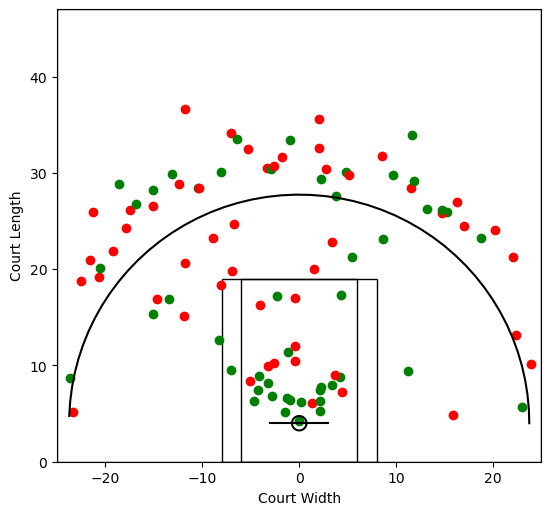

In [12]:
draw_basketball_court(shots = sample_shots)

# Using Best Model (XGBoost) to predict these same shots

In [13]:
shot_data_curry = curry_2021.copy()

In [14]:
# Removing PLAYER_NAME
shot_data_curry = shot_data_curry.drop(columns = ['PLAYER_NAME'])

In [15]:
# Creating Xtrain and YTrain
training_set = shot_data_curry.drop(index = sample_shots.index)
testing_set = shot_data_curry.loc[sample_shots.index]

Xtrain = np.array(training_set.drop(columns = ['SHOT_MADE']))
Ytrain = np.array(training_set['SHOT_MADE'])

Xtest = np.array(testing_set.drop(columns = ['SHOT_MADE']))
Ytest = np.array(testing_set['SHOT_MADE'])

In [16]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 500, max_leaves = 10, learning_rate = 0.1)
xgboost.fit(Xtrain, Ytrain)
pred_shot = xgboost.predict(Xtest)
curry_score = xgboost.score(Xtest, Ytest)
print(f'The accuracy for the XGBoost model for Stephen Curry in 2021 is {curry_score}')

The accuracy for the XGBoost model for Stephen Curry in 2021 is 0.57


In [17]:
pred_curry = sample_shots.copy()
pred_curry['SHOT_MADE'] = pred_shot
print(pred_curry)

        LOC_X  LOC_Y  SHOT_MADE
128268   20.2  24.05          0
127729   -8.9  23.25          1
132403    2.2  29.35          1
126579   -4.2   8.95          0
126844  -18.6  28.85          0
...       ...    ...        ...
131957   15.9   4.85          0
132254    2.0  32.55          0
128068    3.4  22.85          0
128124   -8.3  12.65          0
126745   11.6  33.95          0

[100 rows x 3 columns]


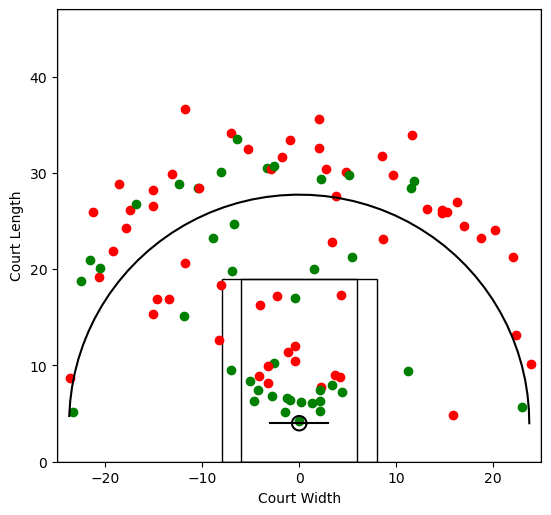

In [18]:
draw_basketball_court(shots = pred_curry)